In [213]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt



In [214]:
df = pd.read_csv('Student_Performance.csv')

In [215]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [216]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [217]:
df.duplicated().sum()

np.int64(127)

In [218]:
df.drop_duplicates(inplace=True)


In [219]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [220]:
df["Extracurricular Activities"].unique()

array(['Yes', 'No'], dtype=object)

In [221]:
df["Extracurricular Activities"] = df["Extracurricular Activities"].apply(lambda x : 1 if x == "Yes" else 0)

In [222]:
df["Extracurricular Activities"].unique()


array([1, 0])

In [223]:
X = df.drop("Performance Index", axis=1)
y = df["Performance Index"]

In [224]:
def zscore_normalize_features(X):
    mu     = np.mean(X, axis=0)             
    std  = np.std(X, axis=0)                  
    X_norm = (X - mu) / std      

    return X_norm

In [225]:
def MES(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [226]:
def test_train_split(X, y, random_state=None, test_size=0.2):
    if random_state is not None:
        np.random.seed(random_state)
    num_samples = len(X)
    indices = np.arange(num_samples)
    np.random.shuffle(indices)
    split = int(num_samples * test_size)
    test_indices = indices[:split]
    train_indices = indices[split:]
    X_train, y_train = X.iloc[train_indices], y.iloc[train_indices]
    X_test, y_test = X.iloc[test_indices], y.iloc[test_indices]
    return X_train, y_train, X_test, y_test

In [227]:
def gradient_descent(X, y, weight, bias, alpha):
    num_records = X.shape[0]
    y_pred = np.dot(X, weight) + bias
    dw = (1 / num_records) * np.dot(X.T, (y_pred - y))
    db = (1 / num_records) * np.sum(y_pred - y)
    weight -= alpha * dw
    bias -= alpha * db
    return weight, bias, y_pred

In [228]:
X = zscore_normalize_features(X)

In [229]:
train_X, train_y, test_X, test_y = test_train_split(X, y, test_size=0.2)

In [230]:
learning_rate = 0.002
iterations = 3000
weight = np.zeros(train_X.shape[1])
bias = 0.0
cost_history = []
for i in range(iterations):
    weight, bias, y_pred = gradient_descent(train_X, train_y, weight, bias, learning_rate)
    mes = MES(train_y, y_pred)
    cost_history.append(mes)


Text(0.5, 1.0, 'Cost vs Iterations')

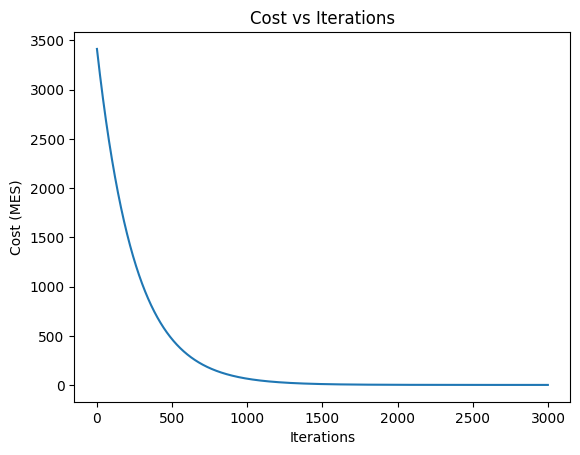

In [231]:
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost (MES)')
plt.title("Cost vs Iterations")

In [232]:
test_predictions = np.dot(test_X, weight) + bias
test_cost = MES(test_y, test_predictions)
print(f"Test MSE: {test_cost}")

Test MSE: 4.1474435981249425
